In [1]:
import numpy as np
import cv2
from pprint import pprint
import ffmpeg
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import imageio

from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

sys.path.append('../')

from precondition import *
from detect_teammates import *

import importlib
importlib.reload(sys.modules['detect_teammates'])
from precondition import *
from detect_teammates import *

In [2]:
with open("../sequences/test_2.seq", mode = 'rb') as f:
    seq = np.fromfile(f, dtype = np.uint8)
width = 272
height = 272
channels = 3
n_frames = int(seq.shape[0] / width / height / channels)
seq = np.reshape(seq, (width, height, channels, n_frames))

In [3]:
#seq = cut_first_minute(filename)
bp_seq = band_pass_filter_seq(seq)
bp_seq_bgr = 255 * np.repeat(np.expand_dims(bp_seq.astype(np.uint8), axis = 2), 3, axis = 2)
team_blobs = filter_sequence(bp_seq_bgr, find_player_filter, s = 3, threshold = 100)
nightmare_seq = clusters_sequence(team_blobs * 255)

5


In [19]:
test_frame = team_blobs[:,:,:,10] * 255

In [6]:
%%timeit
N, CA_test = connected_areas(test_frame[:,:,0])

7.41 s ± 350 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill

In [53]:
plt.imshow(test_frame)

array([  0, 255], dtype=uint8)

In [61]:
%%timeit
seed_points = np.transpose(np.where(test_frame[:,:,0]))
seed_points = set(map(tuple, seed_points))

res = test_frame[:,:,0]
counter = 0
while seed_points:
    counter += 1
    seed_point = seed_points.pop()
    res = flood_fill(res, tuple(seed_point), new_value = counter)
    points_to_exclude = np.transpose(np.where(res == counter))
    points_to_exclude = set(map(tuple, points_to_exclude))
    seed_points -= points_to_exclude

3.37 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
res = test_frame[:,:,0].copy()
seed_points = np.transpose(np.where(res))
seed_points = set(map(tuple, seed_points))
counter = 0
while seed_points:
    counter += 1
    mask = np.zeros(np.asarray(res.shape)+2, dtype=np.uint8)
    seed_point = seed_points.pop()
    points_to_exclude = np.transpose(np.where(res == counter))
    points_to_exclude = set(map(tuple, points_to_exclude))
    seed_points -= points_to_exclude

KeyboardInterrupt: 

In [109]:
test_frame[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

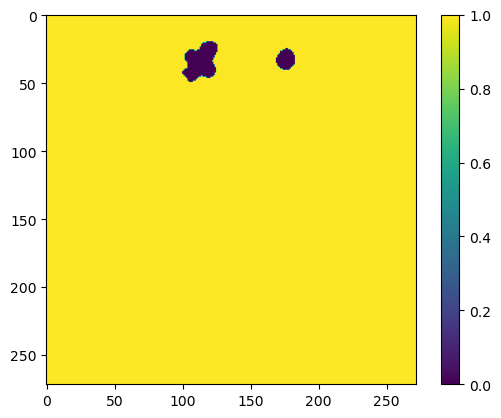

In [106]:
cv2.floodFill(res, mask, tuple(seed_point), newVal = counter)
plt.imshow(res == 23)
plt.colorbar()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'color'

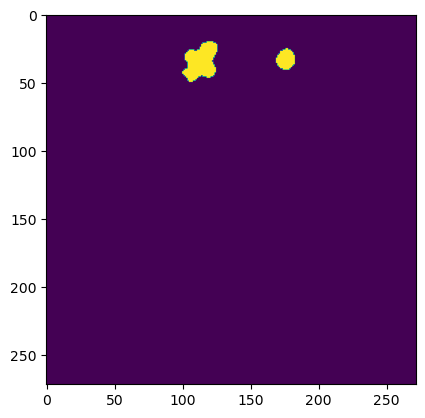

In [100]:
plt.imshow(res)
plt.color
plt.show()

In [84]:
counter

200

In [81]:
matrix = [["c", "c", "b", "a", "a", "b"],
          ["c", "b", "b", "a", "b", "b"],
          ["b", "a", "b", "a", "a", "b"],
          ["b", "a", "b", "a", "b", "b"],
          ["a", "a", "b", "a", "a", "a"],
          ["a", "b", "b", "a", "a", "b"]]

matrix_np = np.asarray(matrix)
numeric_matrix = np.where(matrix_np=="a", 255, 0).astype(np.uint8)
mask = np.zeros(np.asarray(numeric_matrix.shape)+2, dtype=np.uint8)
start_pt = (0,0)
if matrix_np[start_pt]:
  cv2.floodFill(numeric_matrix, mask, start_pt, 255, flags=4)
mask = mask[1:-1, 1:-1]
matrix_np[mask==1] = "c"
matrix = matrix_np.tolist()

In [71]:
mask

array([[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0]], dtype=uint8)

In [80]:
np.unique(numeric_matrix)

array([  0, 255], dtype=uint8)

In [79]:
np.unique(res)

array([  0, 255], dtype=uint8)